# MovieLens 100K Data Exploration
## Initial Data Analysis and Understanding

**Author:** Chinaza Belolisa  
**Date:** October 2024  

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully
Pandas version: 2.2.3
NumPy version: 2.1.3


In [32]:
# Define file paths
DATA_PATH = "../data/raw/"

# File configurations with proper separators and encoding
FILE_CONFIGS = {
    'ratings': {
        'file': 'u.data',
        'sep': '\t',
        'names': ['user_id', 'item_id', 'rating', 'timestamp']
    },
    'movies': {
        'file': 'u.item',
        'sep': '|',
        'encoding': 'latin-1',
        'names': ['movie_id', 'title', 'release_date', 'video_release_date', 
                  'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation',
                  'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
                  'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
                  'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
    },
    'users': {
        'file': 'u.user',
        'sep': '|',
        'names': ['user_id', 'age', 'gender', 'occupation', 'zip_code']
    }
}

print("Configuration loaded")

Configuration loaded


## 1. Data Loading
Load all three main data files and examine their structure.

In [33]:
def load_movielens_file(config_key):
    """Load a MovieLens data file based on configuration."""
    config = FILE_CONFIGS[config_key]
    file_path = DATA_PATH + config['file']
    
    try:
        df = pd.read_csv(
            file_path,
            sep=config['sep'],
            names=config.get('names'),
            encoding=config.get('encoding', 'utf-8'),
            header=None
        )
        print(f"✓ Loaded {config_key}: {df.shape[0]:,} rows, {df.shape[1]} columns")
        return df
    except Exception as e:
        print(f"✗ Error loading {config_key}: {e}")
        return None

# Load all datasets
ratings_df = load_movielens_file('ratings')
movies_df = load_movielens_file('movies')
users_df = load_movielens_file('users')

✓ Loaded ratings: 100,000 rows, 4 columns
✓ Loaded movies: 1,682 rows, 24 columns
✓ Loaded users: 943 rows, 5 columns


In [34]:
# Standardize column names
ratings_df = ratings_df.rename(columns={'item_id': 'movie_id'})
print("Renamed 'item_id' to 'movie_id' for consistency")

# Clean movies data
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')
movies_df = movies_df.drop(columns=['video_release_date'])
print("Parsed release dates and dropped video_release_date column")

Renamed 'item_id' to 'movie_id' for consistency
Parsed release dates and dropped video_release_date column


In [35]:
print("\n" + "="*50)
print("RATINGS DATA")
print("="*50)
print(f"Shape: {ratings_df.shape}")
print(f"Memory usage: {ratings_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\nFirst 5 rows:")
print(ratings_df.head())
print("\nData types:")
print(ratings_df.dtypes)
print("\nBasic statistics:")
ratings_df.describe()


RATINGS DATA
Shape: (100000, 4)
Memory usage: 3.05 MB

First 5 rows:
   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

Data types:
user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

Basic statistics:


,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [36]:
print("\n" + "="*50)
print("MOVIES DATA")
print("="*50)
print(f"Shape: {movies_df.shape}")
print("\nFirst 5 movies:")
movies_df.head()


MOVIES DATA
Shape: (1682, 23)

First 5 movies:


,movie_id,title,release_date,imdb_url,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995-01-01,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
print("\nGenre columns:")
genre_cols = [col for col in movies_df.columns if col not in 
              ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']]
genre_cols


Genre columns:


['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Childrens',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [38]:
print("\n" + "="*50)
print("USERS DATA")
print("="*50)
print(f"Shape: {users_df.shape}")
print("\nFirst 5 users:")
print(users_df.head())
print("\nUnique values per column:")
for col in users_df.columns:
    n_unique = users_df[col].nunique()
    print(f"{col}: {n_unique} unique values")


USERS DATA
Shape: (943, 5)

First 5 users:
   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

Unique values per column:
user_id: 943 unique values
age: 61 unique values
gender: 2 unique values
occupation: 21 unique values
zip_code: 795 unique values


## 2. Data Quality Assessment
Check for missing values, duplicates, and data consistency issues.

In [39]:
def assess_data_quality(df, name):
    """Comprehensive data quality assessment."""
    print(f"\n{'='*50}")
    print(f"DATA QUALITY: {name}")
    print('='*50)
    
    # Missing values
    missing = df.isnull().sum()
    if missing.any():
        print("\n⚠ Missing values found:")
        print(missing[missing > 0])
    else:
        print("\n✓ No missing values")
    
    # Duplicates - check user-movie pairs for ratings data
    if 'user_id' in df.columns and 'movie_id' in df.columns:
        # For ratings data: check duplicate user-movie pairs
        duplicates = df.duplicated(subset=['user_id', 'movie_id']).sum()
        print(f"\n{'⚠' if duplicates > 0 else '✓'} Duplicate user-movie pairs: {duplicates}")
    else:
        # For other data: check full row duplicates
        duplicates = df.duplicated().sum()
        print(f"\n{'⚠' if duplicates > 0 else '✓'} Duplicate rows: {duplicates}")
    
    # Basic info
    print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    return {
        'missing': missing.sum(),
        'duplicates': duplicates,
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2
    }

# Assess all datasets
quality_ratings = assess_data_quality(ratings_df, "Ratings")
quality_movies = assess_data_quality(movies_df, "Movies")
quality_users = assess_data_quality(users_df, "Users")


DATA QUALITY: Ratings

✓ No missing values

✓ Duplicate user-movie pairs: 0

Memory usage: 3.05 MB

DATA QUALITY: Movies

⚠ Missing values found:
release_date    1
imdb_url        3
dtype: int64

✓ Duplicate rows: 0

Memory usage: 0.56 MB

DATA QUALITY: Users

✓ No missing values

✓ Duplicate rows: 0

Memory usage: 0.16 MB


In [41]:
print("\n" + "="*50)
print("DATA RELATIONSHIPS VALIDATION")
print("="*50)

# Check if all user_ids in ratings exist in users
ratings_users = set(ratings_df['user_id'].unique())
users_ids = set(users_df['user_id'].unique())
orphan_users = ratings_users - users_ids
print(f"\n✓ Users in ratings not in users table: {len(orphan_users)}")

# Check if all movie_ids in ratings exist in movies
ratings_movies = set(ratings_df['movie_id'].unique())
movies_ids = set(movies_df['movie_id'].unique())
orphan_movies = ratings_movies - movies_ids
print(f"✓ Movies in ratings not in movies table: {len(orphan_movies)}")

# Verify rating values
rating_values = ratings_df['rating'].unique()
print(f"\n✓ Rating values: {sorted(rating_values)}")
print(f"✓ Rating range: {ratings_df['rating'].min()} to {ratings_df['rating'].max()}")


DATA RELATIONSHIPS VALIDATION

✓ Users in ratings not in users table: 0
✓ Movies in ratings not in movies table: 0

✓ Rating values: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
✓ Rating range: 1 to 5


## 3. Statistical Analysis
Analyze distributions and patterns in the data.

In [44]:
print("\n" + "="*50)
print("RATING STATISTICS")
print("="*50)

# Overall rating statistics
print("\nOverall Rating Distribution:")
print(ratings_df['rating'].value_counts().sort_index())
print(f"\nMean rating: {ratings_df['rating'].mean():.2f}")
print(f"Median rating: {ratings_df['rating'].median():.1f}")
print(f"Std deviation: {ratings_df['rating'].std():.2f}")

# User activity statistics
user_stats = ratings_df.groupby('user_id').agg({
    'rating': ['count', 'mean', 'std'],
    'movie_id': 'nunique'
}).round(2)
user_stats.columns = ['n_ratings', 'avg_rating', 'std_rating', 'n_movies']

print("\n" + "="*50)
print("USER ACTIVITY STATISTICS")
print("="*50)
print(user_stats.describe())

# Movie popularity statistics
movie_stats = ratings_df.groupby('movie_id').agg({
    'rating': ['count', 'mean', 'std'],
    'user_id': 'nunique'
}).round(2)
movie_stats.columns = ['n_ratings', 'avg_rating', 'std_rating', 'n_users']

print("\n" + "="*50)
print("MOVIE POPULARITY STATISTICS")
print("="*50)
print(movie_stats.describe())


RATING STATISTICS

Overall Rating Distribution:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64

Mean rating: 3.53
Median rating: 4.0
Std deviation: 1.13

USER ACTIVITY STATISTICS
        n_ratings  avg_rating  std_rating    n_movies
count  943.000000  943.000000  943.000000  943.000000
mean   106.044539    3.588356    1.019820  106.044539
std    100.931743    0.445136    0.205128  100.931743
min     20.000000    1.490000    0.340000   20.000000
25%     33.000000    3.320000    0.880000   33.000000
50%     65.000000    3.620000    1.010000   65.000000
75%    148.000000    3.870000    1.140000  148.000000
max    737.000000    4.870000    1.750000  737.000000

MOVIE POPULARITY STATISTICS
         n_ratings   avg_rating   std_rating      n_users
count  1682.000000  1682.000000  1541.000000  1682.000000
mean     59.453032     3.076070     1.056684    59.453032
std      80.383846     0.781699     0.292386    80.383846
min       1.000000     1.000000 

In [45]:
# Convert timestamps to datetime
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df['year'] = ratings_df['datetime'].dt.year
ratings_df['month'] = ratings_df['datetime'].dt.month
ratings_df['day_of_week'] = ratings_df['datetime'].dt.dayofweek
ratings_df['hour'] = ratings_df['datetime'].dt.hour

print("\n" + "="*50)
print("TEMPORAL PATTERNS")
print("="*50)
print(f"Date range: {ratings_df['datetime'].min()} to {ratings_df['datetime'].max()}")
print(f"Span: {(ratings_df['datetime'].max() - ratings_df['datetime'].min()).days} days")
print(f"\nRatings per year:")
print(ratings_df['year'].value_counts().sort_index())


TEMPORAL PATTERNS
Date range: 1997-09-20 03:05:10 to 1998-04-22 23:10:38
Span: 214 days

Ratings per year:
year
1997    52899
1998    47101
Name: count, dtype: int64


## 4. Data Visualizations
Create visualizations to better understand the data patterns.

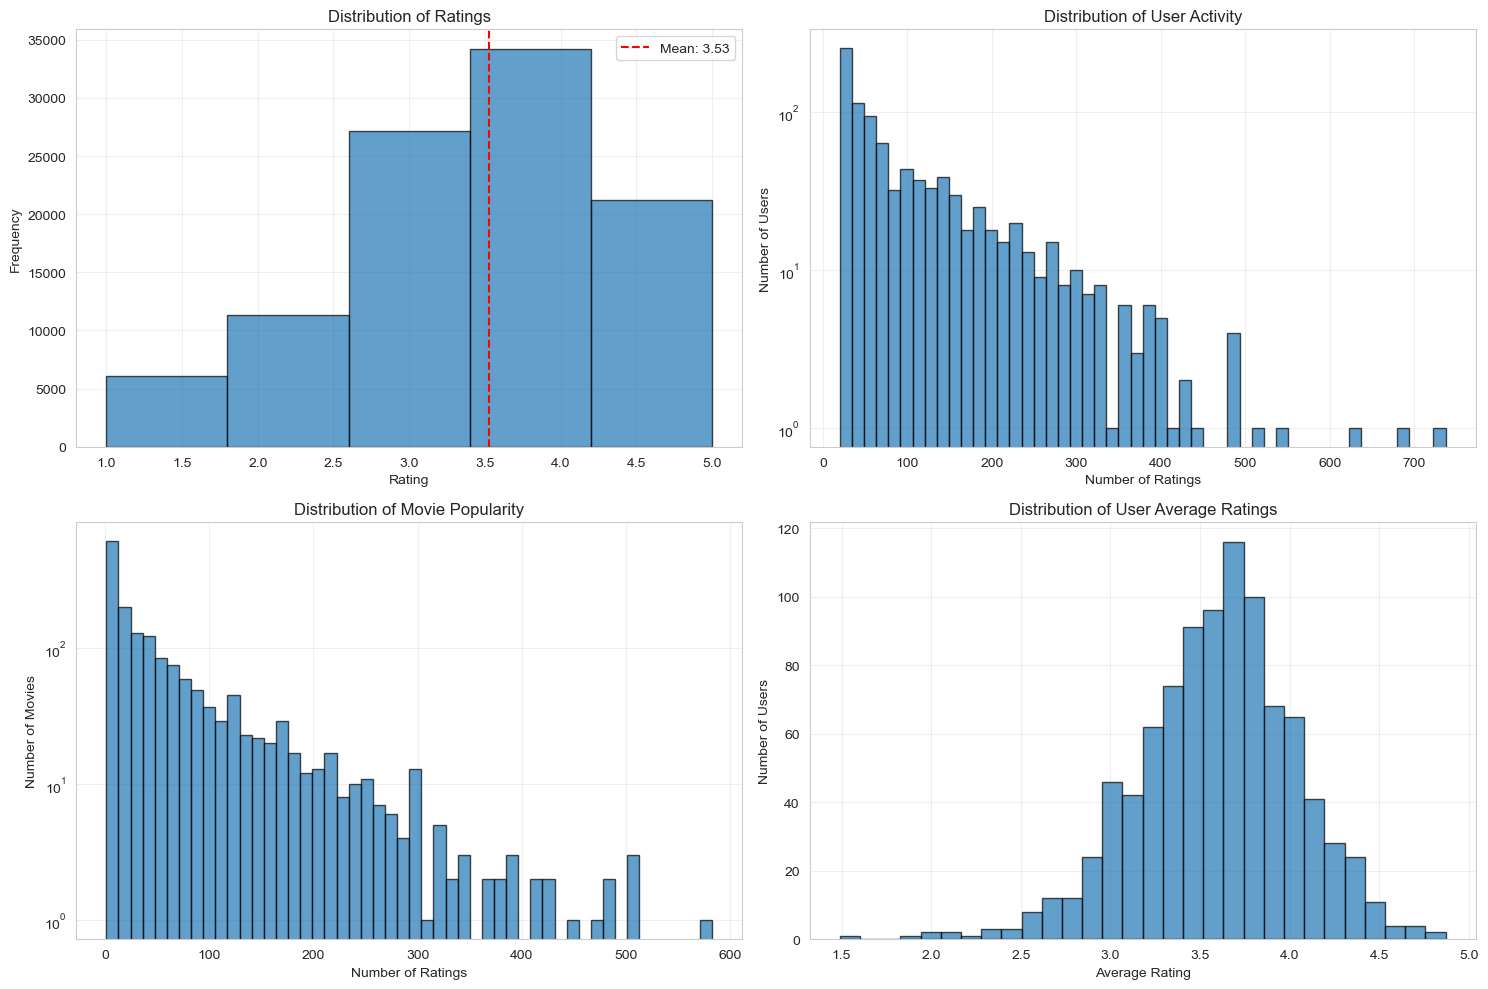

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Rating distribution
axes[0, 0].hist(ratings_df['rating'], bins=5, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Ratings')
axes[0, 0].grid(True, alpha=0.3)

# Add mean line
mean_rating = ratings_df['rating'].mean()
axes[0, 0].axvline(mean_rating, color='red', linestyle='--', 
                   label=f'Mean: {mean_rating:.2f}')
axes[0, 0].legend()

# 2. Ratings per user distribution
axes[0, 1].hist(user_stats['n_ratings'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Number of Ratings')
axes[0, 1].set_ylabel('Number of Users')
axes[0, 1].set_title('Distribution of User Activity')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# 3. Ratings per movie distribution
axes[1, 0].hist(movie_stats['n_ratings'], bins=50, edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Number of Ratings')
axes[1, 0].set_ylabel('Number of Movies')
axes[1, 0].set_title('Distribution of Movie Popularity')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# 4. Average rating by user distribution
axes[1, 1].hist(user_stats['avg_rating'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Average Rating')
axes[1, 1].set_ylabel('Number of Users')
axes[1, 1].set_title('Distribution of User Average Ratings')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

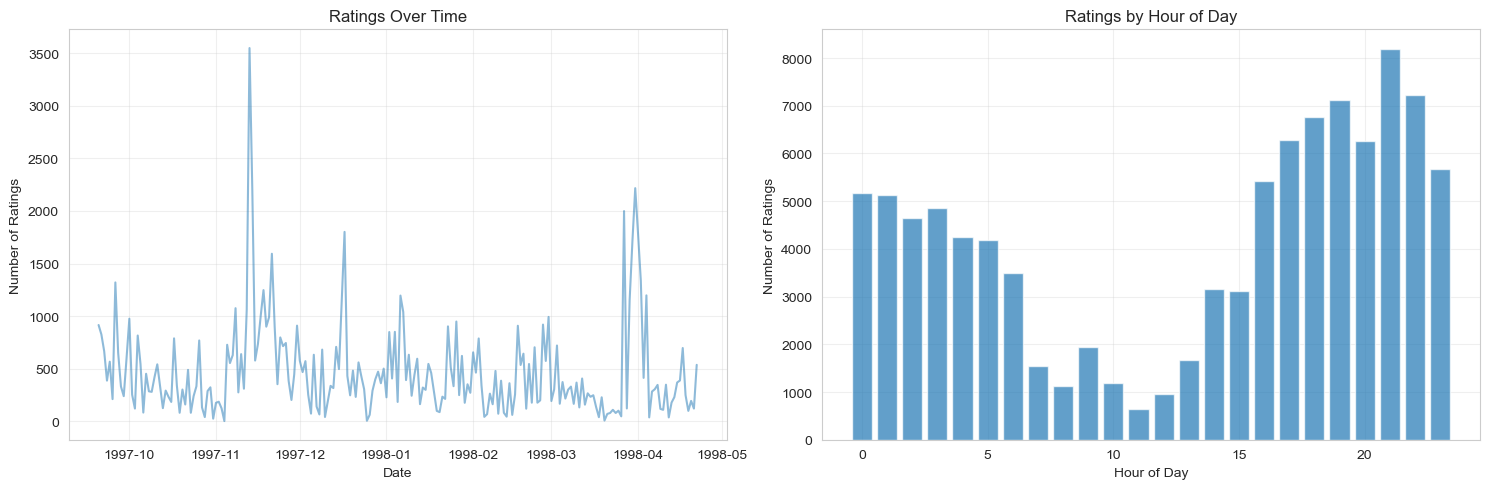

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ratings over time
daily_ratings = ratings_df.groupby(ratings_df['datetime'].dt.date).size()
axes[0].plot(daily_ratings.index, daily_ratings.values, alpha=0.5)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Ratings')
axes[0].set_title('Ratings Over Time')
axes[0].grid(True, alpha=0.3)

# Ratings by hour of day
hourly_ratings = ratings_df.groupby('hour').size()
axes[1].bar(hourly_ratings.index, hourly_ratings.values, alpha=0.7)
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Ratings')
axes[1].set_title('Ratings by Hour of Day')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

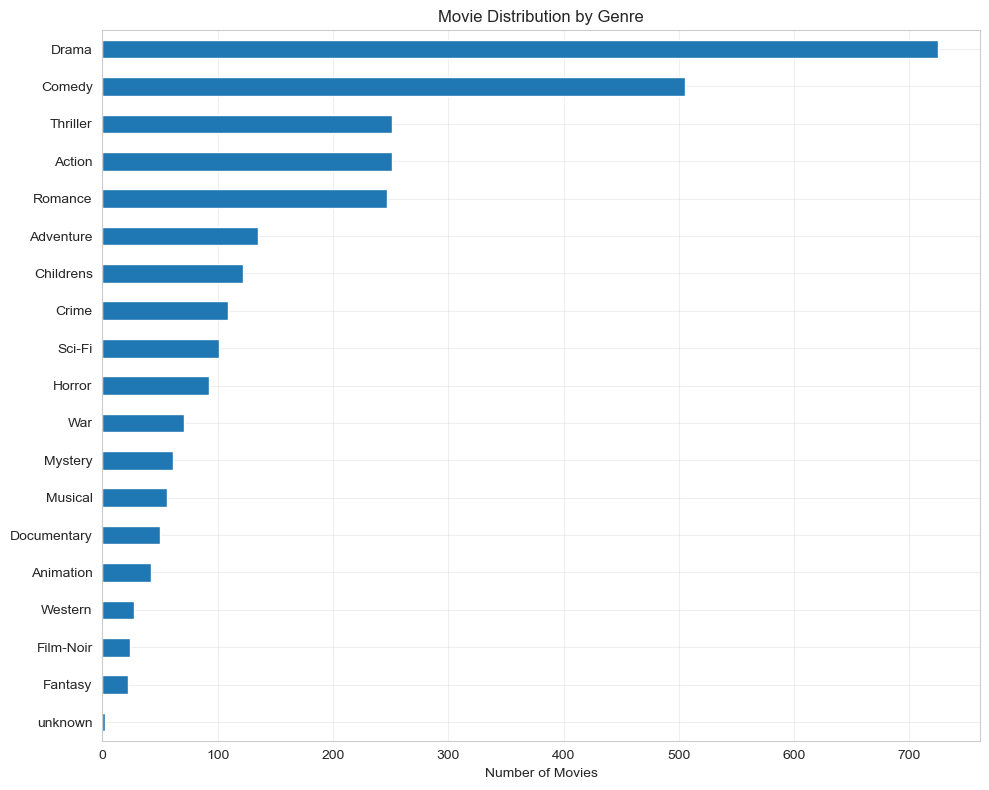


Genre Statistics:
Total movies: 1682
Movies per genre (avg): 152.3
Most common genre: Drama (725 movies)
Least common genre: unknown (2 movies)


In [48]:
# Calculate genre frequencies
genre_counts = movies_df[genre_cols].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
genre_counts.plot(kind='barh')
plt.xlabel('Number of Movies')
plt.title('Movie Distribution by Genre')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGenre Statistics:")
print(f"Total movies: {len(movies_df)}")
print(f"Movies per genre (avg): {genre_counts.mean():.1f}")
print(f"Most common genre: {genre_counts.idxmax()} ({genre_counts.max()} movies)")
print(f"Least common genre: {genre_counts.idxmin()} ({genre_counts.min()} movies)")

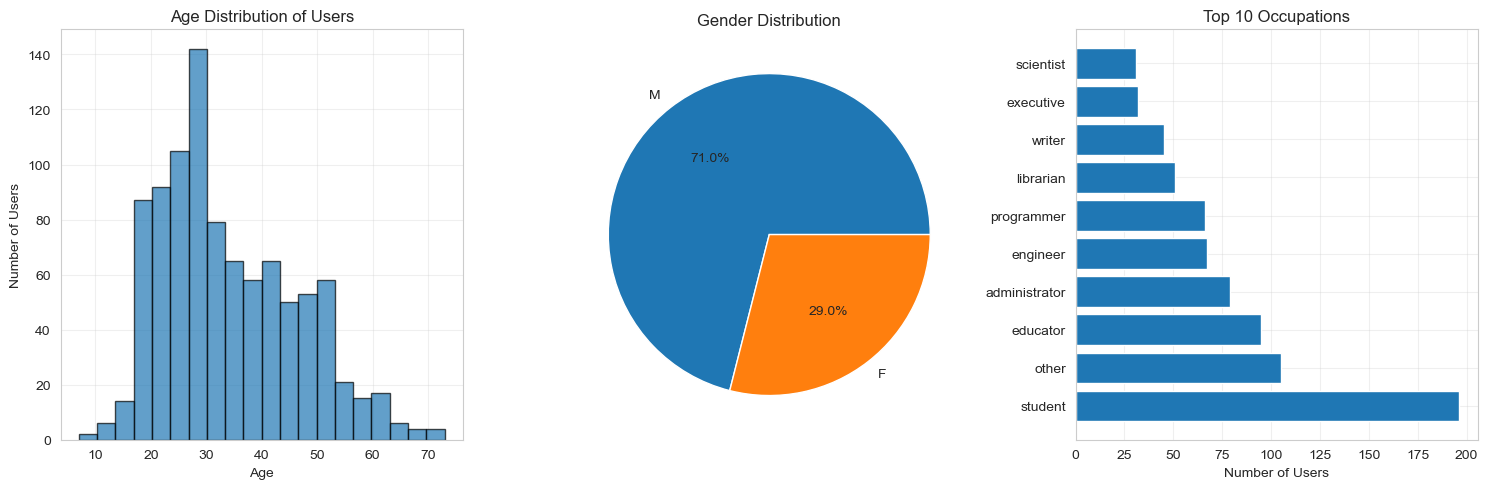

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age distribution
axes[0].hist(users_df['age'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Number of Users')
axes[0].set_title('Age Distribution of Users')
axes[0].grid(True, alpha=0.3)

# Gender distribution
gender_counts = users_df['gender'].value_counts()
axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[1].set_title('Gender Distribution')

# Top occupations
top_occupations = users_df['occupation'].value_counts().head(10)
axes[2].barh(range(len(top_occupations)), top_occupations.values)
axes[2].set_yticks(range(len(top_occupations)))
axes[2].set_yticklabels(top_occupations.index)
axes[2].set_xlabel('Number of Users')
axes[2].set_title('Top 10 Occupations')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [50]:
print("\n" + "="*50)
print("POWER USERS (Top 10 Most Active)")
print("="*50)

top_users = user_stats.nlargest(10, 'n_ratings')[['n_ratings', 'avg_rating']]
print(top_users)

print("\n" + "="*50)
print("MOST POPULAR MOVIES (Top 10)")
print("="*50)

# Get movie titles for popular movies
popular_movies = movie_stats.nlargest(10, 'n_ratings')
popular_movies_with_titles = popular_movies.merge(
    movies_df[['movie_id', 'title']], 
    left_index=True, 
    right_on='movie_id'
)[['title', 'n_ratings', 'avg_rating']]
print(popular_movies_with_titles.to_string())


POWER USERS (Top 10 Most Active)
         n_ratings  avg_rating
user_id                       
405            737        1.83
655            685        2.91
13             636        3.10
450            540        3.86
276            518        3.47
416            493        3.85
537            490        2.87
303            484        3.37
234            480        3.12
393            448        3.34

MOST POPULAR MOVIES (Top 10)
                             title  n_ratings  avg_rating
49                Star Wars (1977)        583        4.36
257                 Contact (1997)        509        3.80
99                    Fargo (1996)        508        4.16
180      Return of the Jedi (1983)        507        4.01
293               Liar Liar (1997)        485        3.16
285    English Patient, The (1996)        481        3.66
287                  Scream (1996)        478        3.44
0                 Toy Story (1995)        452        3.88
299           Air Force One (1997)        

In [51]:
print("\n" + "="*50)
print("SPARSITY ANALYSIS")
print("="*50)

n_users = users_df['user_id'].nunique()
n_movies = movies_df['movie_id'].nunique()
n_possible_ratings = n_users * n_movies
n_actual_ratings = len(ratings_df)
sparsity = 1 - (n_actual_ratings / n_possible_ratings)

print(f"Number of users: {n_users:,}")
print(f"Number of movies: {n_movies:,}")
print(f"Possible ratings: {n_possible_ratings:,}")
print(f"Actual ratings: {n_actual_ratings:,}")
print(f"Sparsity: {sparsity:.2%}")
print(f"Density: {(1-sparsity):.2%}")


SPARSITY ANALYSIS
Number of users: 943
Number of movies: 1,682
Possible ratings: 1,586,126
Actual ratings: 100,000
Sparsity: 93.70%
Density: 6.30%


## 5. Key Findings and Implications for Pipeline

### Data Quality ✓
- **No missing values** in ratings dataset
- **Minimal missing values** in movies (1 release_date, 3 imdb_urls)  
- **No duplicate user-movie pairs**
- **All relationships valid** (user_ids and movie_ids match across tables)
- **Clean rating scale**: 1-5 integer values only

### Data Characteristics
1. **Highly sparse**: Only 6.3% of possible user-movie pairs have ratings (93.7% sparsity)
2. **Skewed distributions**:
   - Most users rate 20-100 movies (median: 27)
   - Most movies have few ratings (long tail distribution)
   - Power users: Top 10% of users provide significant portion of ratings
3. **Rating bias**: Mean rating 3.53 (positive skew - users tend to rate movies they like)
4. **Temporal patterns**: Bulk of ratings from Sept 1997 - April 1998

### Implications for Modeling
1. **Cold start will be an issue** - many movies have <10 ratings
2. **Need to handle sparsity** - use sparse matrix representations or Surprise library
3. **Consider popularity bias** - popular movies dominate recommendations
4. **User segmentation opportunity** - clear power users vs casual users
5. **Pre-built train/test splits available** - Use u1-u5 splits for cross-validation

### Next Steps
1. Build data preprocessing pipeline with proper train/test splits
2. Implement baseline models (global mean, user mean, movie mean)
3. Build collaborative filtering models and evaluate with RMSE/MAE
4. **Statistical Inference**: 
   - Test if genre significantly affects ratings (ANOVA)
   - Analyze correlation between user age and rating patterns
   - Bootstrap confidence intervals for model performance
5. Compare multiple recommendation approaches with statistical significance tests

In [52]:
# Save summary statistics for later use
summary_stats = {
    'n_users': n_users,
    'n_movies': n_movies,
    'n_ratings': n_actual_ratings,
    'sparsity': sparsity,
    'mean_rating': ratings_df['rating'].mean(),
    'std_rating': ratings_df['rating'].std(),
    'ratings_per_user_median': user_stats['n_ratings'].median(),
    'ratings_per_movie_median': movie_stats['n_ratings'].median(),
    'date_range': {
        'start': str(ratings_df['datetime'].min()),
        'end': str(ratings_df['datetime'].max())
    }
}

# Save to file for pipeline
import json
with open('../data/processed/data_statistics.json', 'w') as f:
    json.dump(summary_stats, f, indent=2)

print("Summary statistics saved to data/processed/data_statistics.json")
print("\nDataset ready for pipeline development! 🎬")

Summary statistics saved to data/processed/data_statistics.json

Dataset ready for pipeline development! 🎬
